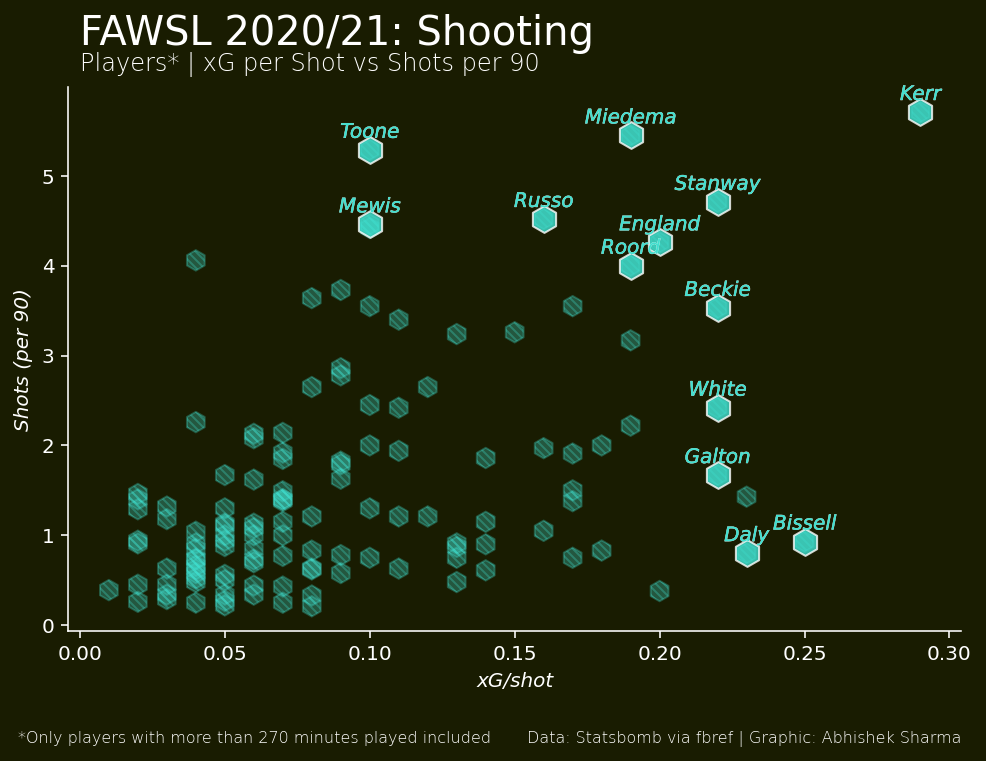

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from adjustText import adjust_text
import matplotlib.patheffects as pe

%config InlineBackend.figure_format = 'retina'

def custom_scatter(df, x, y, color_cat, title, xlabel, ylabel, highlight_col, highlight_vals):
    with plt.style.context('custom_viz_dark'):
        fig, ax = plt.subplots(figsize=(8,5))
        ax.scatter(df[x], df[y], s=105, alpha=.3, hatch=r"\\\\\\", color='turquoise', marker='h')
        ax.text(x=0.0, y=6.8, s=title, ha='left', va='top', fontsize=20, fontweight='regular')
        ax.text(x=0.0, y=6.38, s="Players* | xG per Shot vs Shots per 90", ha='left', va='top', fontweight='light', fontsize=12)
        
        fig.text(0.9, -0.03, "*Only players with more than 270 minutes played included       Data: Statsbomb via fbref | Graphic: Abhishek Sharma", 
                 ha='right', fontsize=8, fontweight='light')
        
        
        ###spines, title fontsize, alignment, bold, subtitles, axes labels and ticks italic, scatter bigger, whiter, hatching, alpha 
        ###highlight key players footer text, credits
        
        [ax.spines[spine].set_visible(False) for spine in ['top','right']]   
        #ax.tick_params(axis="both", labelsize=5, labelcolor="turquoise")
        ax.set_ylabel(ylabel, fontstyle='italic', fontweight='regular')
        ax.set_xlabel(xlabel, fontstyle='italic', fontweight='regular')
        
        sel = df.query(f"{highlight_col} in @highlight_vals")
        ax.scatter(sel[x], sel[y], ec='white', color='turquoise', marker='h', s=180, alpha=.8)
        texts = [ax.text(x, y+0.09, s.split(" ")[-1], color='turquoise', fontstyle='italic', va='bottom', ha='center', path_effects=[pe.withStroke(linewidth=0.2, foreground="white")]) for x,y,s in zip(sel[x], sel[y], sel[highlight_col])]
        #adjust_text(texts)
        
    return fig, ax
sel_players = ['Sam Kerr',
                'Vivianne Miedema',
                'Ella Toone',
                'Georgia Stanway',
                'Alessia Russo',
                'Emma Bissell',
                'Rachel Daly',
                'Ellen White', 
                'Janine Beckie',
                'Leah Galton',
                'Bethany England', 
                'Sam Mewis', 
                'Jill Roord'
              ]
fig, ax = custom_scatter(df=df, x='npxG/Sh', y='Sh', color_cat = 'Squad', 
                        title="FAWSL 2020/21: Shooting", xlabel="xG/shot", ylabel="Shots (per 90)", 
                        highlight_col='Player', highlight_vals=sel_players)
fig.savefig('final_shooting.png', dpi=180)

In [7]:
df = pd.read_csv("fawsl.csv")

print(df.columns)
df['Player'] = df['Player'].apply(lambda x: x.split("\\")[0])
df['npxG/Sh'] = df['npxG/Sh'].fillna(0)
df['90s'] = df['90s'].fillna(0)
df['Sh'] = df['Sh'].fillna(0)
df = df[(df['90s']>3) & (df['Sh']>0.2)].reset_index(drop=True)[['Player', 'Squad', 'npxG/Sh', '90s', 'Sh', 'Pos']]
df.head()

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches'],
      dtype='object')


,Player,Squad,npxG/Sh,90s,Sh,Pos
0,Angela Addison,Tottenham,0.17,6.5,1.38,FW
1,Chloe Arthur,Aston Villa LFC,0.02,5.0,1.40,MF
2,Anita Asante,Aston Villa LFC,0.05,3.7,0.27,MFDF
3,Rosella Ayane,Tottenham,0.11,3.3,2.42,FWMF
4,Ona Batlle,Manchester Utd,0.02,4.8,1.46,DF


In [15]:
df.sort_values('Sh', ascending=False).head(10)

,Player,Squad,npxG/Sh,90s,Sh,Pos
61,Sam Kerr,Chelsea,0.29,4.2,5.71,FWMF
80,Vivianne Miedema,Arsenal,0.19,7.7,5.45,FW
111,Ella Toone,Manchester Utd,0.10,7.0,5.29,MF
104,Georgia Stanway,Manchester City,0.22,5.1,4.71,FW
97,Alessia Russo,Manchester Utd,0.16,3.1,4.52,FW
79,Sam Mewis,Manchester City,0.10,6.5,4.46,MF
49,Pernille Harder,Chelsea,0.10,4.3,4.42,FWMF
29,Bethany England,Chelsea,0.20,4.7,4.26,FW
122,Fara Williams,Reading,0.04,3.2,4.06,MF
94,Jill Roord,Arsenal,0.19,4.0,4.00,MF


In [ ]:
[]